In [3]:
import os
import json
from matplotlib import pyplot as plt

In [34]:
# Search for the available json files in the results folder:
rootdir = "../results/datapoints"

plot_info_files = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith("detailed.json"):
            plot_info_files.append(os.path.join(subdir, file))
    break # <-- This ensures that we only search in a depth of one.

solution_files = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith("solution.json"):
            solution_files.append(os.path.join(subdir, file))
    break # <-- This ensures that we only search in a depth of one.

# Reading the files and storing the info in dicts: 
plot_info_less_trivial_1e4 = {}
plot_info_less_trivial_1e8 = {}
plot_info_self_1e4 = {}

for file in plot_info_files:
    file_name = file.split("/")[-1].removesuffix('.json')
    
    if (file_name.startswith("less_trivial_lp") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_less_trivial_1e4[file_name] = json.load(json_content)
        # print("Read file:", file_name)

    if (file_name.startswith("less_trivial_lp") and "1e-8" in file_name):
        with open(file) as json_content:
            plot_info_less_trivial_1e8[file_name] = json.load(json_content)
        print("Read file:", file_name)

    if (file_name.startswith("self") and "1e-4" in file_name):
        with open(file) as json_content:
            plot_info_self_1e4[file_name] = json.load(json_content)
        print("Read file:", file_name)

# Saving accurate solutions in a dict as well: 
solutions = {}

for file in solution_files:
    file_name = file.split("/")[-1].removesuffix('.json')
    
    with open(file) as json_content:
        solutions[file_name] = json.load(json_content)
    print("Read file:", file_name)

Read file: less_trivial_lp_dwifob_alt_C_+primal_weight_restart=40_1e-8_m=0_detailed
Read file: less_trivial_lp_dwifob_alt_C_+primal_weight_restart=40_1e-8_m=1_detailed
Read file: self_baseline_+step_size_1e-4_detailed
Read file: self_baseline_pdhg_1e-4_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=0_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=10_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=15_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=1_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=20_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=30_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=3_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=40_detailed
Read file: self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=5_detailed
Read file: self_dwifob_org_+primal_weight_restart=40_1e-4_m=0_detailed
Read 

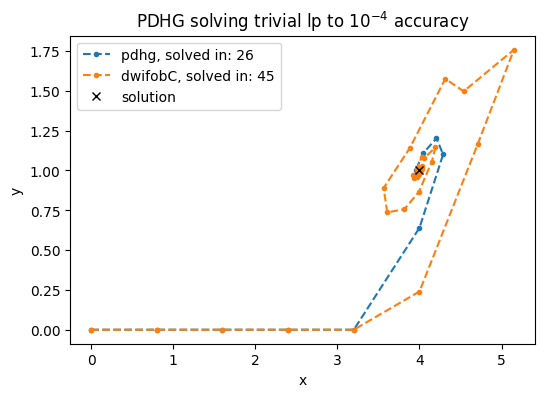

In [5]:
# Visualizing the trivial lp solved with PDHG:
pdgh_solve = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=0_detailed"]
dwifob_solve = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=1_detailed"]
dwifob_solveA = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_altA_dwifob_1e-4_m=1_detailed"]
dwifob_solveB = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_altB_dwifob_1e-4_m=1_detailed"]
dwifob_solveC = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_altC_dwifob_1e-4_m=1_detailed"]

plt.figure(figsize=(6, 4))
iters=len(pdgh_solve["primal_iterates"])
plt.plot(pdgh_solve["primal_iterates"], pdgh_solve["dual_iterates"], ".--", label=f"pdhg, solved in: {iters}")
# iters=len(dwifob_solve["primal_iterates"])
# plt.plot(dwifob_solve["primal_iterates"], dwifob_solve["dual_iterates"], ".--", label=f"dwifob, solved in: {iters}")
# iters=len(dwifob_solveA["primal_iterates"])
# plt.plot(dwifob_solveA["primal_iterates"], dwifob_solveA["dual_iterates"], ".--", label=f"dwifobA, solved in: {iters}")
# iters=len(dwifob_solve["primal_iterates"])
# plt.plot(dwifob_solveB["primal_iterates"], dwifob_solveB["dual_iterates"], ".--", label=f"dwifobB, solved in: {iters}")
iters=len(dwifob_solveC["primal_iterates"])
plt.plot(dwifob_solveC["primal_iterates"], dwifob_solveC["dual_iterates"], ".--", label=f"dwifobC, solved in: {iters}")

plt.plot(4, 1, "xk", label="solution")
plt.xlabel("x") 
plt.ylabel("y")
plt.title("PDHG solving trivial lp to $10^{-4}$ accuracy")
plt.legend();

In [150]:
def plot_dwifob_iterates(dwifob_solve, accurate_solution, 
                         window, end, title, 
                         primal_idx=0, dual_idx=0, 
                         hat_iterates=True, arrows=True):
    # Only plotting the selected dimensions: 
    if end == -1:
        end = len(dwifob_solve["primal_iterates"]) - 1
    start = max(0, end-window)
    primal_dwifob = dwifob_solve["primal_iterates"][start:end]
    primal_hat_dwifob = dwifob_solve["primal_hat_iterates"][start:end]
    primal_deviations = dwifob_solve["primal_deviations"][start:end]
    dual_dwifob = dwifob_solve["dual_iterates"][start:end]
    dual_hat_dwifob = dwifob_solve["dual_hat_iterates"][start:end]
    dual_deviations = dwifob_solve["dual_deviations"][start:end]

    # Only displaying the correct dimensions: 
    primal_iters_dim = [vec[primal_idx] for vec in primal_dwifob]
    primal_hat_iters_dim = [vec[primal_idx] for vec in primal_hat_dwifob]
    primal_deviations_dim = [vec[primal_idx] for vec in primal_deviations]
    dual_iters_dim = [vec[dual_idx] for vec in dual_dwifob]
    dual_hat_iters_dim = [vec[dual_idx] for vec in dual_hat_dwifob]
    dual_deviations_dim = [vec[dual_idx] for vec in dual_deviations]

    plt.figure(figsize=(8, 6))
    plt.plot(primal_iters_dim, dual_iters_dim, "+--", label=f"iterates", markersize=10)
    if hat_iterates: 
        plt.plot(primal_hat_iters_dim, dual_hat_iters_dim, "x--", label="hat iterates", markersize=10)

    if arrows:
        for i in range(len(primal_deviations_dim)):
            if not (primal_deviations_dim[i] == 0 and dual_deviations_dim[i] == 0):
                # plt.arrow(primal_iters_dim[i], dual_iters_dim[i], primal_deviations_dim[i], dual_deviations_dim[i], 
                #         color="r", lw=1, fill=False, head_length=0, head_width=0, length_includes_head=True, overhang=0)
                vector_x = [primal_iters_dim[i], primal_hat_iters_dim[i]]
                vector_y = [dual_iters_dim[i], dual_hat_iters_dim[i]]               
                plt.plot(vector_x, vector_y, "r")
    
    plt.plot(accurate_solution["primal_solution"][primal_idx], accurate_solution["dual_solution"][dual_idx], "xk", label="solution", markersize=8)
    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title(title)
    plt.legend();

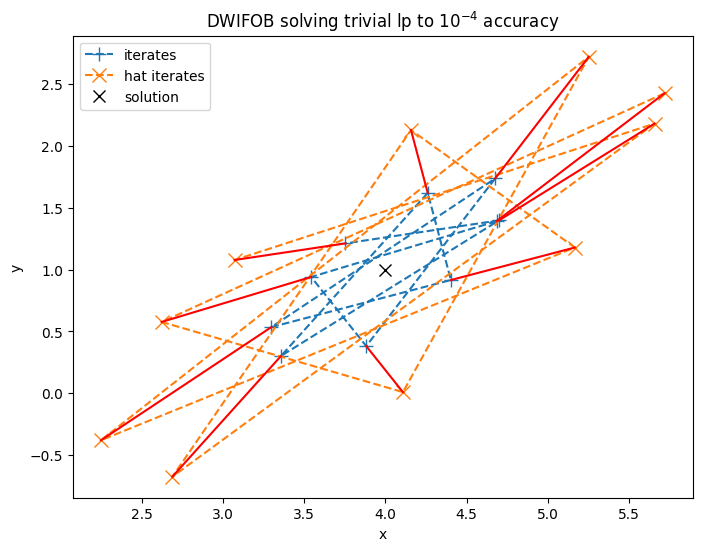

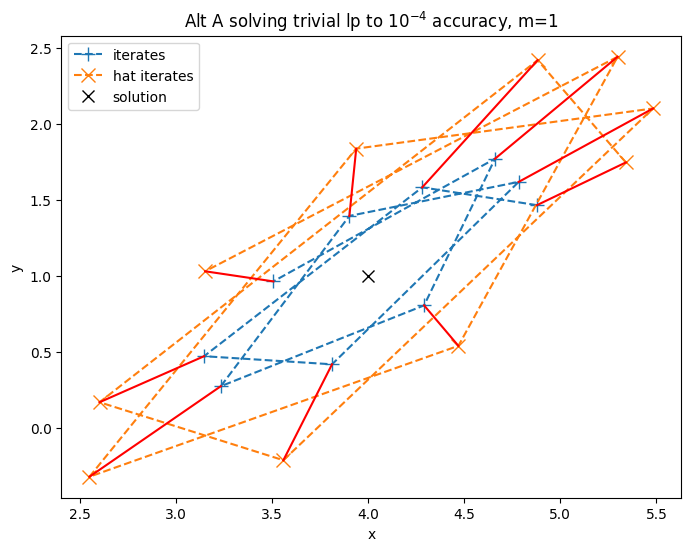

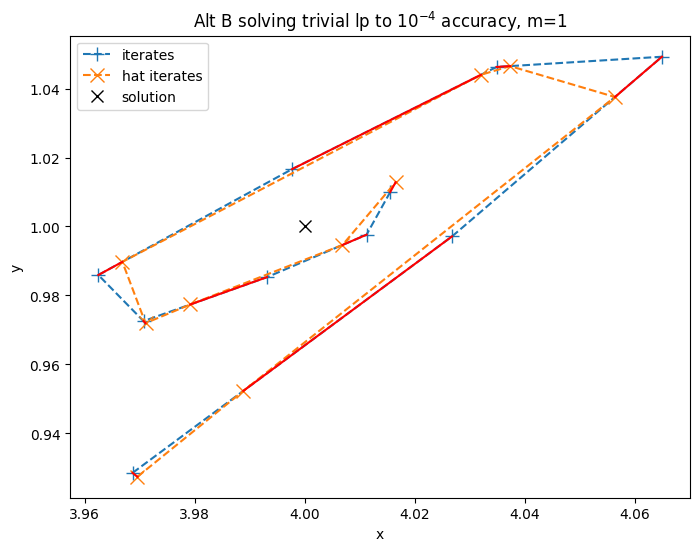

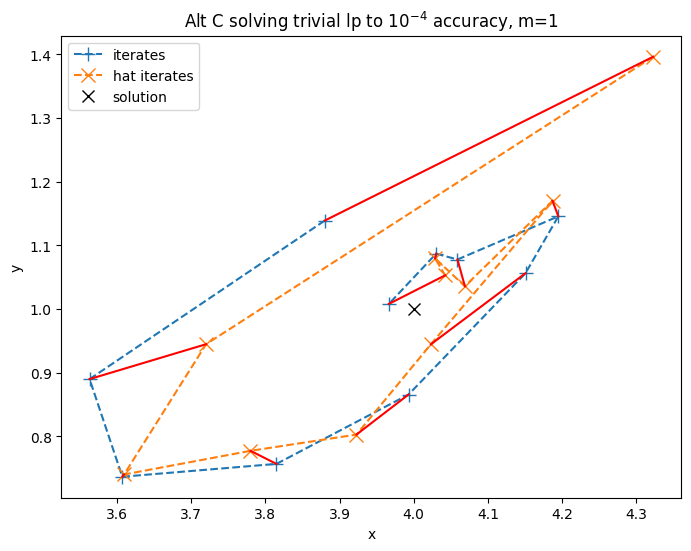

In [151]:
trivial_solution = {
    "primal_solution": [4], 
    "dual_solution": [1],
}
dwifob_solve = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_dwifob_1e-4_m=1_detailed"]
dwifob_solve_altA = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_altA_dwifob_1e-4_m=1_detailed"]
dwifob_solve_altB = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_altB_dwifob_1e-4_m=1_detailed"]
dwifob_solve_altC = plot_info_less_trivial_1e4["less_trivial_lp_dwifob_altC_dwifob_1e-4_m=1_detailed"]

iters=len(dwifob_solve["primal_iterates"])
end = 20         # Up to which iterate we see.
window = 10      # How many iterates we see at the same time.
plot_dwifob_iterates(dwifob_solve, trivial_solution, window, end, "DWIFOB solving trivial lp to $10^{-4}$ accuracy")
plot_dwifob_iterates(dwifob_solve_altA, trivial_solution, window, end, "Alt A solving trivial lp to $10^{-4}$ accuracy, m=1")
plot_dwifob_iterates(dwifob_solve_altB, trivial_solution, window, end, "Alt B solving trivial lp to $10^{-4}$ accuracy, m=1")
plot_dwifob_iterates(dwifob_solve_altC, trivial_solution, window, end, "Alt C solving trivial lp to $10^{-4}$ accuracy, m=1")


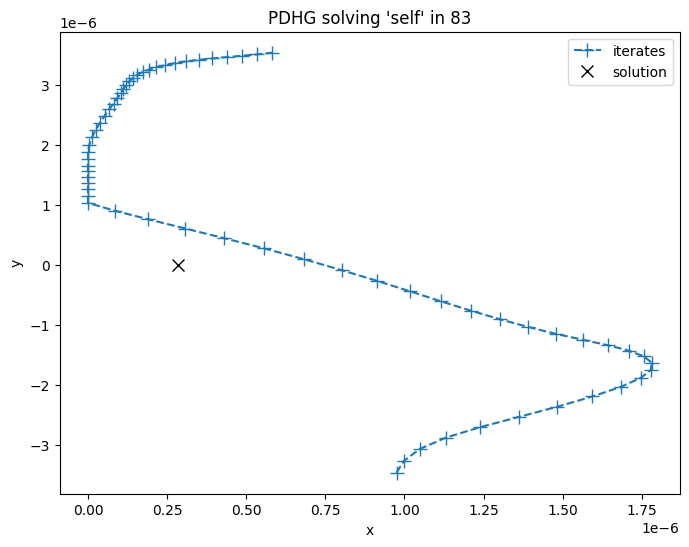

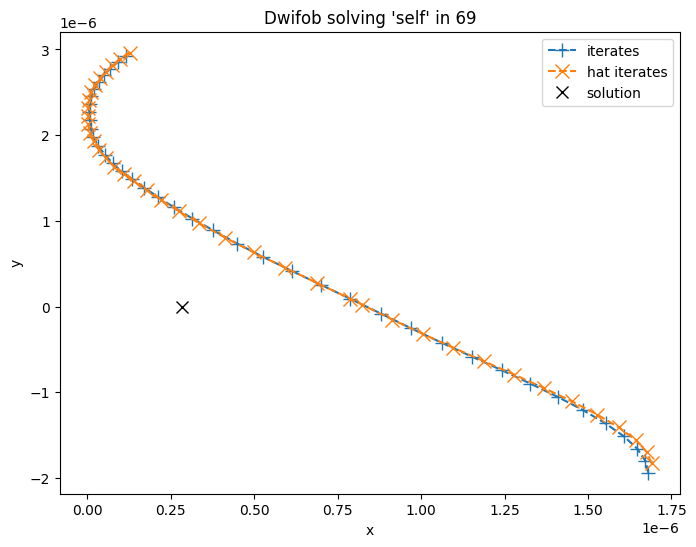

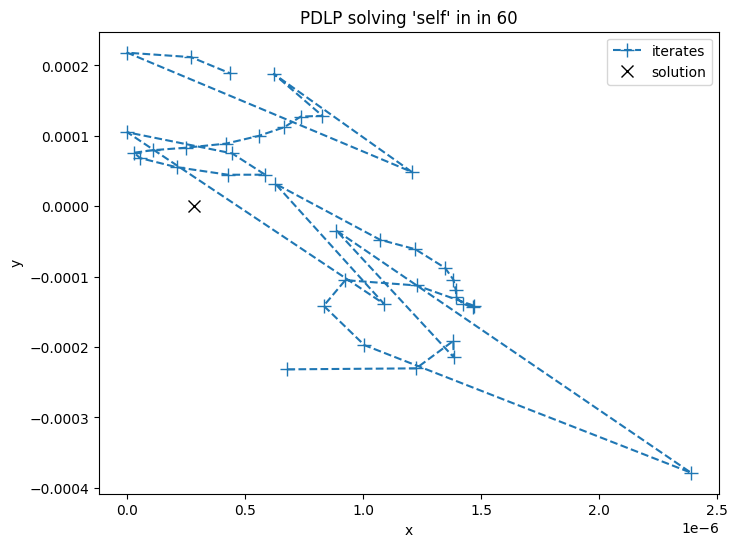

In [ ]:
# Examining the convergence behaviour on the "self" instance:
primal_idx = 8      # Which primal dimension to show 
dual_idx = 0        # Which dual dimension to show
self_solution = solutions["self_baseline_+step_size_1e-12_solution"]
pdhg_solve = plot_info_self_1e4["self_dwifob_org_+primal_weight_restart=40_1e-4_m=0_detailed"]
dwifob_solve = plot_info_self_1e4["self_dwifob_org_+primal_weight_restart=40_1e-4_m=5_detailed"]
dwifob_solve_altC = plot_info_self_1e4["self_dwifob_alt_C_+primal_weight_restart=40_1e-4_m=5_detailed"]
pdlp_solve = plot_info_self_1e4["self_baseline_+step_size_1e-4_detailed"]

iters=len(pdhg_solve["primal_iterates"])
plot_dwifob_iterates(pdhg_solve, self_solution, 65, -1, f"PDHG solving 'self' in {iters}", primal_idx, dual_idx, False, False)
iters=len(dwifob_solve["primal_iterates"])
plot_dwifob_iterates(dwifob_solve, self_solution, 40, -1, f"Dwifob solving 'self' in {iters}", primal_idx, dual_idx, True, False)
# iters=len(dwifob_solve_altC["primal_iterates"])
# plot_dwifob_iterates(dwifob_solve_altC, self_solution, 65, -1, f"Alt C solving 'self' in in {iters}", primal_idx, dual_idx, True, False)
iters=len(pdlp_solve["primal_iterates"])
plot_dwifob_iterates(pdlp_solve, self_solution, 40, -1, f"PDLP solving 'self' in in {iters}", primal_idx, dual_idx, False, False)

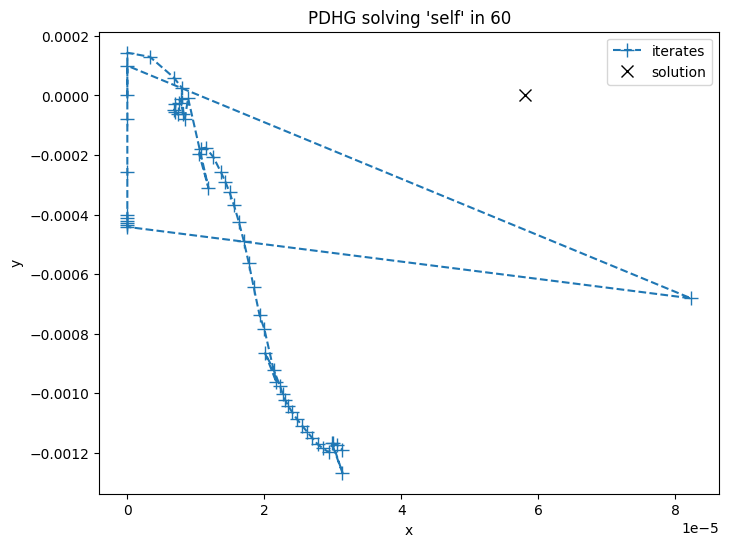

In [ ]:
# Some interesting dimensions maybe... We should probably do the same visualization on another problem as well. 
primal_idx = 55
dual_idx = 92
plot_dwifob_iterates(pdlp_solve, self_solution, 65, -1, f"PDHG solving 'self' in {iters}", primal_idx, dual_idx, False, False)

In [264]:
# To display different dimensions: 
primal_idx = 0
dual_idx = 0

Primal dimension:  1


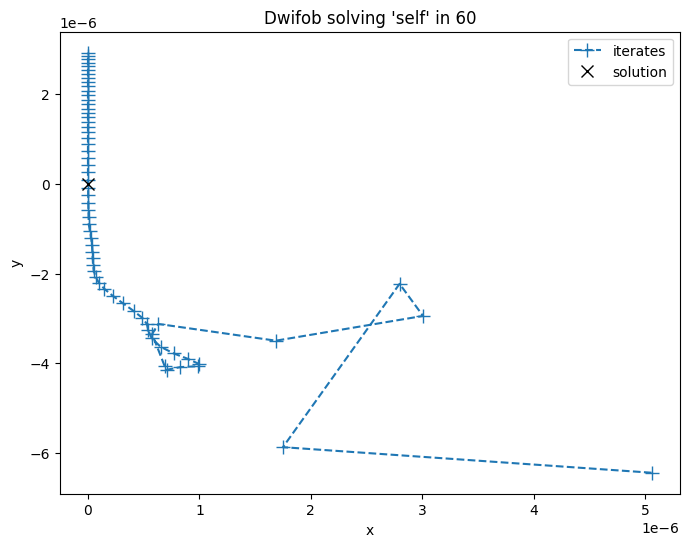

In [265]:
# Iterate through primal dimensions for DWIFOB: 
primal_idx = primal_idx + 1 
print("Primal dimension: ", primal_idx)
plot_dwifob_iterates(dwifob_solve, self_solution, 65, -1, f"Dwifob solving 'self' in {iters}", primal_idx, dual_idx, False, False)

Dual dimension:  1


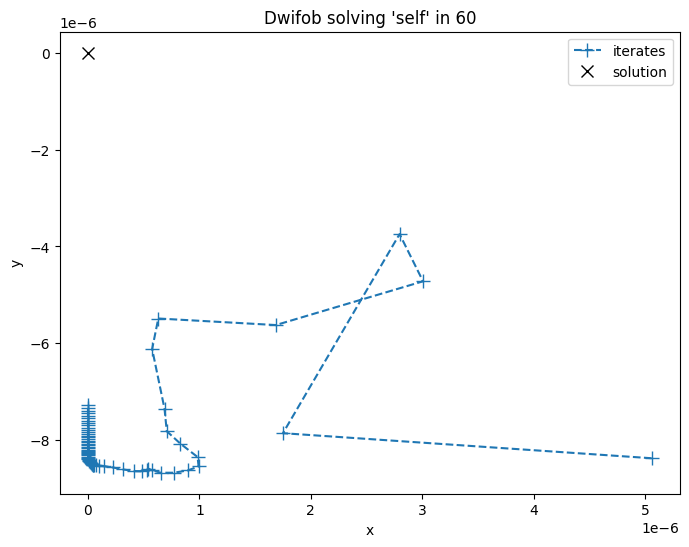

In [266]:
# Iterate through dual dimensions for DWIFOB: 
dual_idx = dual_idx + 1 
print("Dual dimension: ", dual_idx)
plot_dwifob_iterates(dwifob_solve, self_solution, 65, -1, f"Dwifob solving 'self' in {iters}", primal_idx, dual_idx, False, False)